# Think Aloud study  version

Month order correspond to online order. We take the subset of Months [1,2,3,5,6,11,12]


In [1]:
# This is used to import the modules from the experiment folder
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
# First the model builder functionality needs to be imported.
from model_builder import Item, ModelBuilder
from agents import RandomAgent
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def reorder_list(ls, indices):
    """Reoders a list by the provided list of indices.
    The list of indices provides the new order by defining which element shall be put 
    at the given place.
    
    Args:
        ls (list): the list that should be reordered.
        indices (list): a list of indices with the same length as ls.
        
    Example: 
    my_list = [1,2,3]
    reorder_list(my_list, [2,0,1]) # --> my_list = [3,1,2]
    """
    ls = [ls[x] for x in indices]
    return ls




def get_subset(subset,itemlist ):
    return  [itemlist[x] for x in subset]


# reordering from the original order (just for archive) in the cell below there are already the reordered lists
#c_profit = reorder_list([2,3,3,2,2,1,2,3,2,2,2,2], indices)
#t_profit = reorder_list([4,4,4,5,4,3,4,5,4,4,3,3], indices)
#book_profit = reorder_list([7,7,5,5,3,5,4,4,5,4,5,6], indices)
#bed_profit = reorder_list([7,8,10,8,6,7,7,8,10,9,7,10], indices)
#wood_order = reorder_list([200, 300, 457, 372, 322, 432, 413, 406, 377, 412, 395, 366],indices)
#metal_order = reorder_list([463, 168, 773, 380, 353, 391, 392, 473, 370, 350, 351, 293], indices)
#indices = [6,1,4,3,2,5,0,10,8,9,7,11]
#reorder_list([200, 300, 457, 372, 322, 432, 413, 406, 377, 412, 395, 366],indices)

In [3]:
# These values are needed to build the model
factor_resources = 2
indices = [6,1,4,3,2,5,0,10,8,9,7,11] # Lists have been reordered by request. Remove the method calls if you want to
# change the order freely. It just could save time if you want to change specific months.
# define the profit per month for each item:
#subset_months = [0,1,2,4,5,10,11] (original subset for choice)
subset_months_group1 = [0,4,5,10,1,2,11]
subset_months_group2 = [0,10,11,4,2,1,5]

def calc_model(subset, factor_resources, model_name):
    chair_profit =    get_subset(subset, [2, 3, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2])
    table_profit =    get_subset(subset, [4, 4, 4, 5, 4, 3, 4, 3, 4, 4, 5, 3])
    bed_profit =      get_subset(subset, [4, 7, 3, 5, 5, 5, 7, 5, 5, 4, 4, 6] )
    bookcase_profit = get_subset(subset, [7, 8, 6, 8, 10, 7, 7, 7, 10, 9, 8, 10])



    # define the items:
    chair = Item(costs_wood=4,costs_metal=1,costs_time_one=4,costs_time_two=1,profit=chair_profit)
    table = Item(2,5,4,6,table_profit)
    bed = Item(4,3,3,4, bed_profit)
    bookcase = Item(5,7,5,3,bookcase_profit)
    # Making calculations for one year
    months = 12
    # specifying available materials
    avail_hours_a = 26*factor_resources
    avail_hours_b = 30*factor_resources
    avail_hours_c = 23*factor_resources
    avail_hours_d = 26*factor_resources

    avail_wood_raw = list(map(lambda i: round(i/4), [413, 300, 322, 372, 457, 432, 200, 395, 377, 412, 406, 366]))
    avail_metal_raw = list(map(lambda i: round(i/4), [392, 168, 353, 380, 773, 391, 463, 351, 370, 350, 473, 293]))

    avail_wood = get_subset(subset,avail_wood_raw)
    avail_metal = get_subset(subset,avail_metal_raw)
    
    plt.figure(figsize=(10, 5), dpi=80)
    df_res = pd.DataFrame( {'wood': avail_wood, 'metal' : avail_metal, 'wsA': avail_hours_a})
    df_res['month'] = df_res.index+1
    df_res = df_res.melt(id_vars = ['month'],value_vars = ['wood', 'metal', 'wsA'])
    #df_res['month'] = df_res.index

    sns.barplot(data = df_res, x='month', y='value', hue = 'variable')
    # Set up the model builder: 
    model_builder = ModelBuilder(months=len(subset),avail_wood=avail_wood, avail_metal=avail_metal 
                            , avail_hours_a=avail_hours_a,avail_hours_b=avail_hours_b
                            , avail_hours_c=avail_hours_c,avail_hours_d=avail_hours_d
                            , chair=chair,table=table, bed=bed, bookcase=bookcase)
    # build the model:
    model = model_builder.build_model()
    model_builder.save_model(model_name)
    a = RandomAgent(model,len(subset))
    a.simulate_year()
    a.optimal_solution.save_solution(model_name+'_solution')
    return model

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmp9jxvdzca.glpk.raw --wglp /tmp/tmp7q3c2h5n.glpk.glp --cpxlp
 /tmp/tmp6y8hylr9.pyomo.lp
Reading problem data from '/tmp/tmp6y8hylr9.pyomo.lp'...
43 rows, 29 columns, 113 non-zeros
28 integer variables, none of which are binary
335 lines were read
Writing problem data to '/tmp/tmp7q3c2h5n.glpk.glp'...
288 lines were written
GLPK Integer Optimizer, v4.65
43 rows, 29 columns, 113 non-zeros
28 integer variables, none of which are binary
Preprocessing...
41 rows, 28 columns, 108 non-zeros
28 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  7.000e+00  ratio =  7.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 41
Solving LP relaxation...
GLPK Simplex Optimizer, v4.65
41 rows, 28 columns, 108 non-zeros
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (28)
*    35: obj =   7.803914736e+02 inf =   0.000e+0

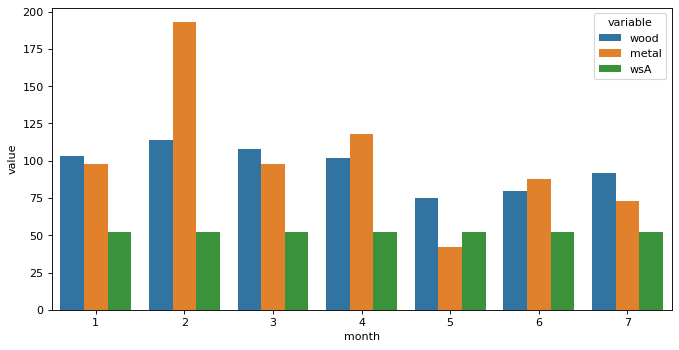

In [18]:
modelname = 'thinkaloud_model'
calc_model(subset_months_group1, factor_resources, modelname+'_group1')


GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmp725qywvg.glpk.raw --wglp /tmp/tmp9xrl8yql.glpk.glp --cpxlp
 /tmp/tmp4zgu2hyj.pyomo.lp
Reading problem data from '/tmp/tmp4zgu2hyj.pyomo.lp'...
43 rows, 29 columns, 113 non-zeros
28 integer variables, none of which are binary
335 lines were read
Writing problem data to '/tmp/tmp9xrl8yql.glpk.glp'...
288 lines were written
GLPK Integer Optimizer, v4.65
43 rows, 29 columns, 113 non-zeros
28 integer variables, none of which are binary
Preprocessing...
41 rows, 28 columns, 108 non-zeros
28 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  7.000e+00  ratio =  7.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 41
Solving LP relaxation...
GLPK Simplex Optimizer, v4.65
41 rows, 28 columns, 108 non-zeros
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (28)
*    35: obj =   7.803914736e+02 inf =   0.000e+0

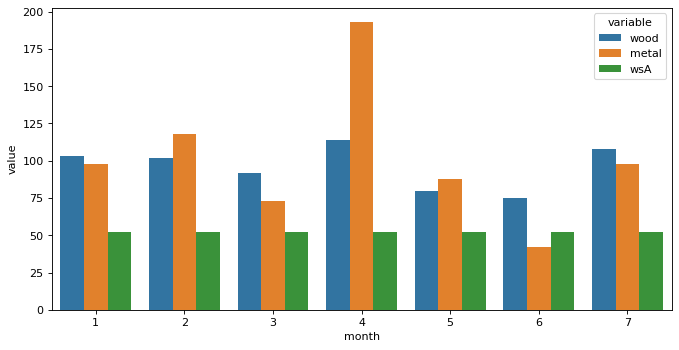

In [5]:
modelname = 'thinkaloud_model'

calc_model(subset_months_group2, factor_resources, modelname+'_group2')


GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmpru6smxuy.glpk.raw --wglp /tmp/tmpa6qfq60i.glpk.glp --cpxlp
 /tmp/tmpc62g2kps.pyomo.lp
Reading problem data from '/tmp/tmpc62g2kps.pyomo.lp'...
73 rows, 49 columns, 193 non-zeros
48 integer variables, none of which are binary
565 lines were read
Writing problem data to '/tmp/tmpa6qfq60i.glpk.glp'...
488 lines were written
GLPK Integer Optimizer, v4.65
73 rows, 49 columns, 193 non-zeros
48 integer variables, none of which are binary
Preprocessing...
71 rows, 48 columns, 188 non-zeros
48 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  7.000e+00  ratio =  7.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 71
Solving LP relaxation...
GLPK Simplex Optimizer, v4.65
71 rows, 48 columns, 188 non-zeros
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (48)
*    61: obj =   1.342041474e+03 inf =   1.776e-1

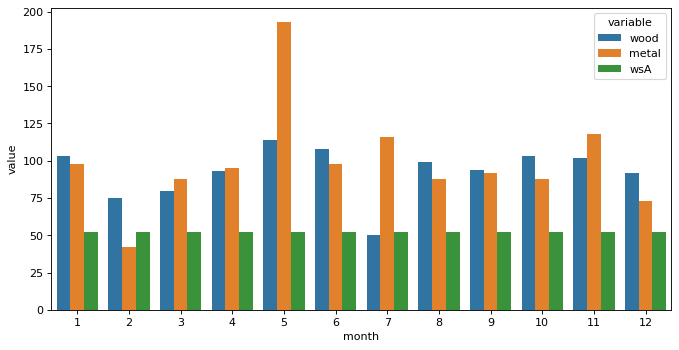

In [8]:
modelname = 'thinkaloud_model'
calc_model([0,1,2,3,4,5,6,7,8,9,10,11], factor_resources, modelname+'_all_months')


In [14]:
import json
month = 0
f = open('thinkaloud_model_solution.xml')
data = json.load(f)
optimal_val = 0
keys = ['numberOfBeds', 'numberOfBookCases', 'numberOfTables', 'numberOfChairs']
for i in range(4):
    print(data[keys[i]][month])
    
data

10
3
8
5


{'objective': 768,
 'numberOfBeds': [10, 12, 0, 2, 10, 2, 2],
 'numberOfBookCases': [3, 0, 8, 8, 3, 8, 8],
 'numberOfTables': [8, 0, 5, 9, 9, 9, 0],
 'numberOfChairs': [5, 6, 7, 4, 2, 4, 11]}